In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
sns.set_style('darkgrid')

In [16]:
houses = pd.read_csv('houses_to_rent.csv')
houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [17]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [18]:
houses.describe().round(2)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
std,537.02,1.17,1.41,1.59,15592.31,3408.55,3107.83,47.77,16484.73
min,11.00,1.00,1.00,0.00,0.00,450.00,0.00,3.00,499.00
25%,56.00,2.00,1.00,0.00,170.00,1530.00,38.00,21.00,2061.75
50%,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
75%,182.00,3.00,3.00,2.00,1237.50,5000.00,375.00,68.00,6768.00
max,46335.00,13.00,10.00,12.00,1117000.00,45000.00,313700.00,677.00,1120000.00


In [19]:
#change spaces for underscores
cols = houses.columns
cols = cols.map(lambda x: x.replace(' ','_') if isinstance(x, (str)) else x)
houses.columns = cols
#change the categorical variables
houses.animal.replace(['acept','not acept'],[1,0], inplace = True)
houses.furniture.replace(['furnished','not furnished'],[1,0], inplace = True)
#change "$" for use queries
houses.rename(columns={'hoa_(R$)' : 'hoa',
'rent_amount_(R$)' : 'rent_amount',
'property_tax_(R$)' : 'property_tax',
'fire_insurance_(R$)' : 'fire_insurance',
'total_(R$)' : 'total'}, inplace = True)

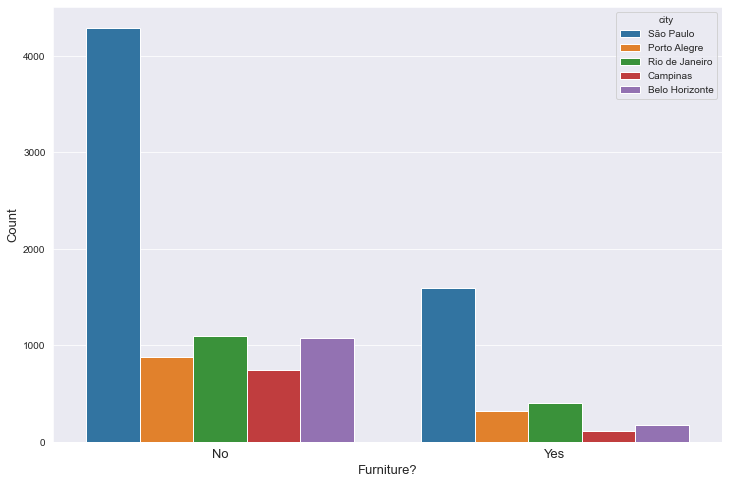

In [20]:
ax = sns.countplot(houses['furniture'], hue = houses['city'])
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Furniture?', fontsize=13)
ax.set_ylabel('Count', fontsize=13)
ax.set_xticklabels(['No','Yes'], fontsize=13)
ax

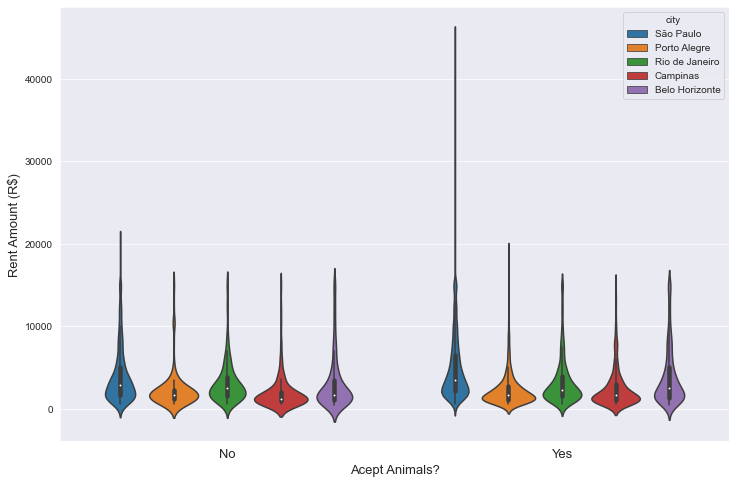

In [21]:
ax = sns.violinplot(x ='animal', y ='rent_amount',
data = houses, hue ='city')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Acept Animals?', fontsize=13)
ax.set_ylabel('Rent Amount (R$)', fontsize=13)
ax.set_xticklabels(['No','Yes'], fontsize=13)
ax


Text(0, 0.5, 'Size of Area')

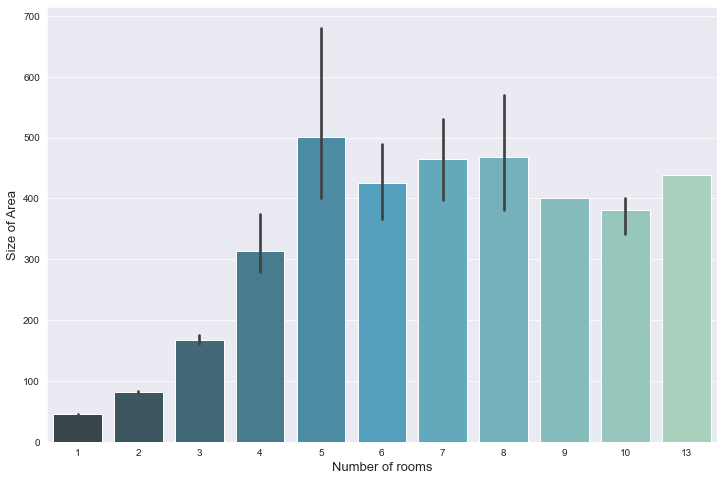

In [22]:
ax = sns.barplot(x='rooms', y='area', data = houses, 
palette = 'GnBu_d')
ax.figure.set_size_inches(12, 8)
ax.set_xlabel('Number of rooms', fontsize=13)
ax.set_ylabel('Size of Area', fontsize=13)


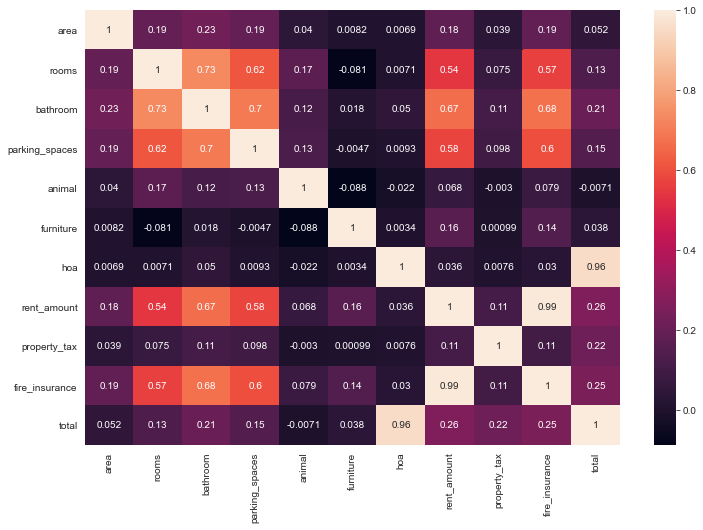

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(houses.corr(), annot=True)


In [24]:
metrics = [] #list with RMSE values
y = houses['rent_amount'] #Creating a Series for target variable


In [25]:
#Creating a DF for explanatory variables
x = houses.drop(['rent_amount','city','parking_spaces','area',
'bathroom','furniture','animal','floor','rooms', 'total'], axis = 1)


In [26]:
#Splitting data arrays into two subset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 8)
reg = LinearRegression() #Instantiating the model 
reg.fit(x_train, y_train) #Training data
predict = reg.predict(x_test) 


In [27]:
#add a constant and looking the summary
x_train_constant = sm.add_constant(x_train)
model_sm = sm.OLS(y_train, x_train_constant, hascont = True).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:            rent_amount   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.019e+05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:04   Log-Likelihood:                -57544.
No. Observations:                7484   AIC:                         1.151e+05
Df Residuals:                    7480   BIC:                         1.151e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            125.1073      9.168     13.

In [28]:
#looking the metrics
print('MAE: ', mean_absolute_error(y_test, predict).round(3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predict)).round(3))
print('R2:', r2_score(y_test, predict).round(3))
metrics.append(np.sqrt(mean_squared_error(y_test, predict)))

MAE:  348.245
RMSE:  1310.989
R2: 0.85
